<a href="https://colab.research.google.com/github/mia1996/rlcard-tutoirial/blob/master/leduc_holdem_cfr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# <a href='https://github.com/datamllab/rlcard'> <center> <img src='https://miro.medium.com/max/1000/1*_9abDpNTM9Cbsd2HEXYm9Q.png' width=500 class='center' /></a> 

## **Training CFR on Leduc Hold'em**
To show how we can use `step` and `step_back` to traverse the game tree, we provide an example of solving Leduc Hold'em with CFR:

* First, we install RLcard and Tensorflow. To use Tensorflow implementation of the example algorithms, we recommend installing the supported verison of Tensorflow with rlcard[tensorflow].

In [0]:
pip install rlcard

     |████████████████████████████████| 6.7MB 2.5MB/s 
  Created wheel for rlcard: filename=rlcard-0.2.4-cp36-none-any.whl size=6746015 sha256=62157c5ba06595e3ea75a6202cfc445ce95495116701dc59899e1fbfbd2b9cd6
  Stored in directory: /root/.cache/pip/wheels/c3/a0/b5/bb8f10f5f5b3b8727ee0a135432168c3860ee23558366a4b5a
Successfully built rlcard


In [0]:
pip install rlcard[tensorflow]

     |████████████████████████████████| 110.5MB 46kB/s 
     |████████████████████████████████| 512kB 45.3MB/s 
     |████████████████████████████████| 3.8MB 47.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=c9d48a8b1b81a9b144032f15955809721e4df9d61f82ce85b16c25de59c1b31c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: 

* Then, we import the modules that are wraped up in rlcard packages. Before the training process, we set the iterations numbers, initialize the memory size and the frequency that we evaluate the performance. After training the game, we will save the performance data and learning curves to ./log.

In [0]:
import numpy as np

import rlcard
from rlcard.agents import CFRAgent
from rlcard import models
from rlcard.utils import set_global_seed, tournament
from rlcard.utils import Logger

In [0]:
# Make environment and enable human mode
env = rlcard.make('leduc-holdem', config={'seed': 0, 'allow_step_back':True})
eval_env = rlcard.make('leduc-holdem', config={'seed': 0})

In [0]:
# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
save_plot_every = 1000
evaluate_num = 10000
episode_num = 10000

# The paths for saving the logs and learning curves
log_dir = './experiments/leduc_holdem_cfr_result/'

# Set a global seed
set_global_seed(0)

# Initilize CFR Agent
agent = CFRAgent(env)
agent.load()  # If we have saved model, we first load the model

# Evaluate CFR against pre-trained NFSP
eval_env.set_agents([agent, models.load('leduc-holdem-nfsp').agents[0]])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)






Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.





Instructions for updating:
Please switch to tf.train.get_global_step

INFO:tensorflow:Restoring parameters from /usr/local/lib/python3.6/dist-packages/rlcard/models/pretrained/leduc_holdem_nfsp/model


* Now we start to train CFR on Lecuc Hold'em. The training logs and the learning curves are shown as below.

In [0]:
for episode in range(episode_num):
    agent.train()
    print('\rIteration {}'.format(episode), end='')
    # Evaluate the performance. Play with NFSP agents.
    if episode % evaluate_every == 0:
        agent.save() # Save model
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

Iteration 0
----------------------------------------
  timestep     |  192
  reward       |  -0.83815
----------------------------------------
Iteration 100
----------------------------------------
  timestep     |  19392
  reward       |  0.0758
----------------------------------------
Iteration 200
----------------------------------------
  timestep     |  38592
  reward       |  0.24285
----------------------------------------
Iteration 300
----------------------------------------
  timestep     |  57792
  reward       |  0.3915
----------------------------------------
Iteration 400
----------------------------------------
  timestep     |  76992
  reward       |  0.4978
----------------------------------------
Iteration 500
----------------------------------------
  timestep     |  96192
  reward       |  0.4288
----------------------------------------
Iteration 600
----------------------------------------
  timestep     |  115392
  reward       |  0.46055
-------------------------

./experiments/leduc_holdem_cfr_result/performance.csv


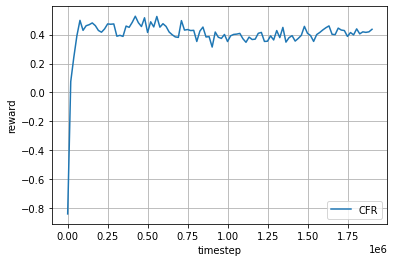

In [0]:
# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('CFR')

### Good job! Now you have your trained Leduc Hold'em with CFR!